In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
moviedf =pd.read_csv('/content/movies (2).csv')
ratingdf = pd.read_csv('/content/ratings.csv (1).zip')
moviedf.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [78]:
ratingdf.head()

,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523


In [79]:
moviedf.shape,ratingdf.shape

((10329, 3), (105339, 4))

In [80]:
moviedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10329 entries, 0 to 10328
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  10329 non-null  int64 
 1   title    10329 non-null  object
 2   genres   10329 non-null  object
dtypes: int64(1), object(2)
memory usage: 242.2+ KB


In [81]:
ratingdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105339 entries, 0 to 105338
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     105339 non-null  int64  
 1   movieId    105339 non-null  int64  
 2   rating     105339 non-null  float64
 3   timestamp  105339 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.2 MB


In [82]:
moviedf.describe()

,movieId
count,10329.000000
mean,31924.282893
std,37734.741149
min,1.000000
25%,3240.000000
50%,7088.000000
75%,59900.000000
max,149532.000000


In [83]:
ratingdf.describe()

,userId,movieId,rating,timestamp
count,105339.000000,105339.000000,105339.000000,1.053390e+05
mean,364.924539,13381.312477,3.516850,1.130424e+09
std,197.486905,26170.456869,1.044872,1.802660e+08
min,1.000000,1.000000,0.500000,8.285650e+08
25%,192.000000,1073.000000,3.000000,9.711008e+08
50%,383.000000,2497.000000,3.500000,1.115154e+09
75%,557.000000,5991.000000,4.000000,1.275496e+09
max,668.000000,149532.000000,5.000000,1.452405e+09


In [84]:
moviedf[moviedf['title'].duplicated()]

,movieId,title,genres
6270,26982,Men with Guns (1997),Drama
7963,64997,War of the Worlds (2005),Action|Sci-Fi


In [85]:
moviedf.drop(moviedf.loc[moviedf['movieId']==26982].index,inplace=True)
moviedf.drop(moviedf.loc[moviedf['movieId']==64997].index,inplace=True)

In [86]:
moviedf.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

In [87]:
ratingdf.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [88]:
from wordcloud import WordCloud

In [89]:
g =[]
for genre in moviedf.genres:
  x = genre.split('|')
  for i in x:
    if i not in g:
      g.append(str(i))
g = str(g)
movie_title=[]
for i in moviedf.title:
  movie_title.append(i[0:-7])
movie_title=str(movie_title)

In [90]:
wordcloud_genre=WordCloud(width=1500,height=800,background_color='black',min_font_size=2
                    ,min_word_length=3).generate(g)
wordcloud_title=WordCloud(width=1500,height=800,background_color='cyan',min_font_size=2
                    ,min_word_length=3).generate(movie_title)

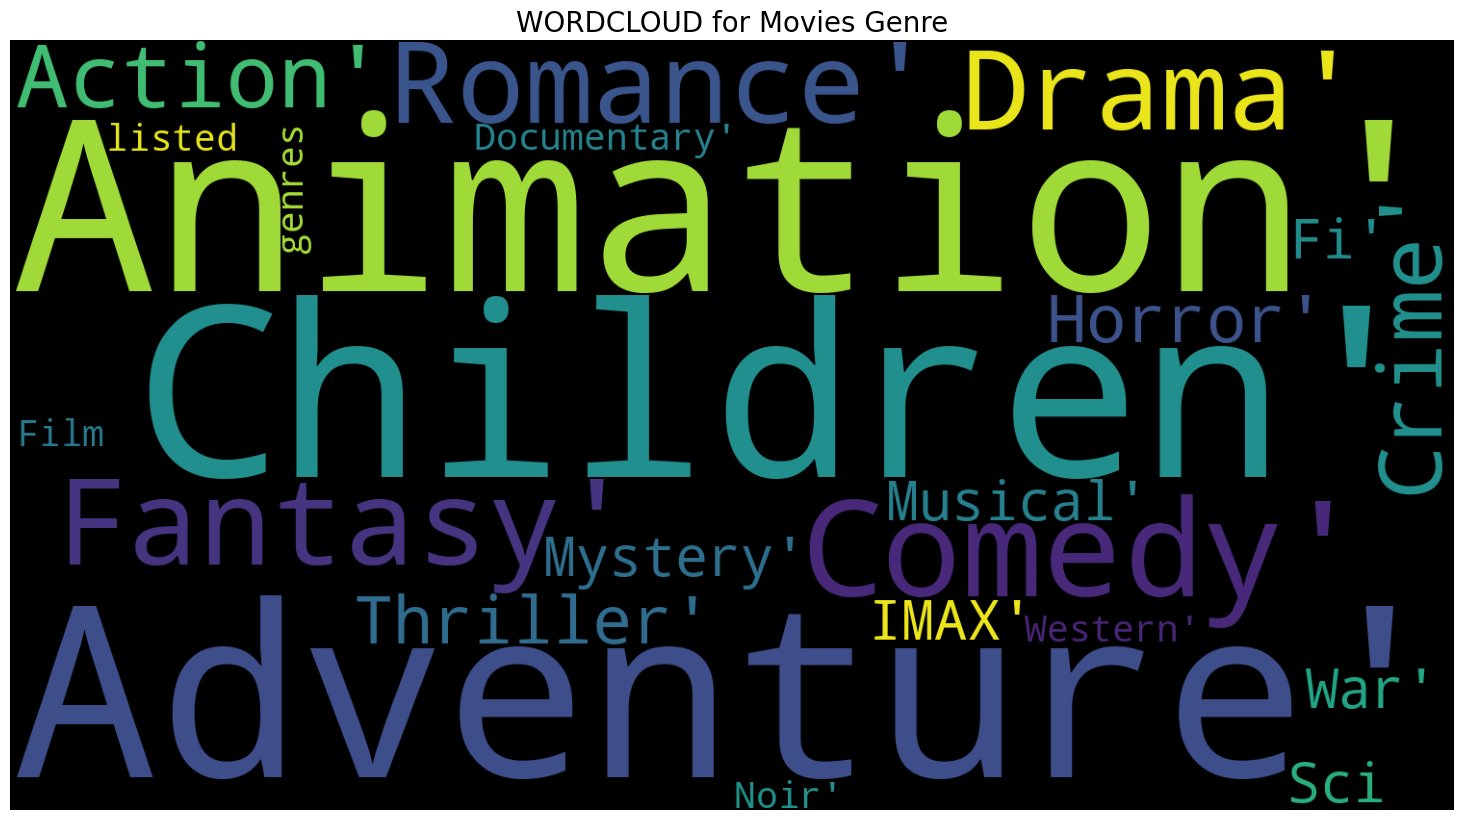

In [91]:
plt.figure(figsize=(20,10))
plt.axis('off')
plt.title('WORDCLOUD for Movies Genre',fontsize=20)
plt.imshow(wordcloud_genre)

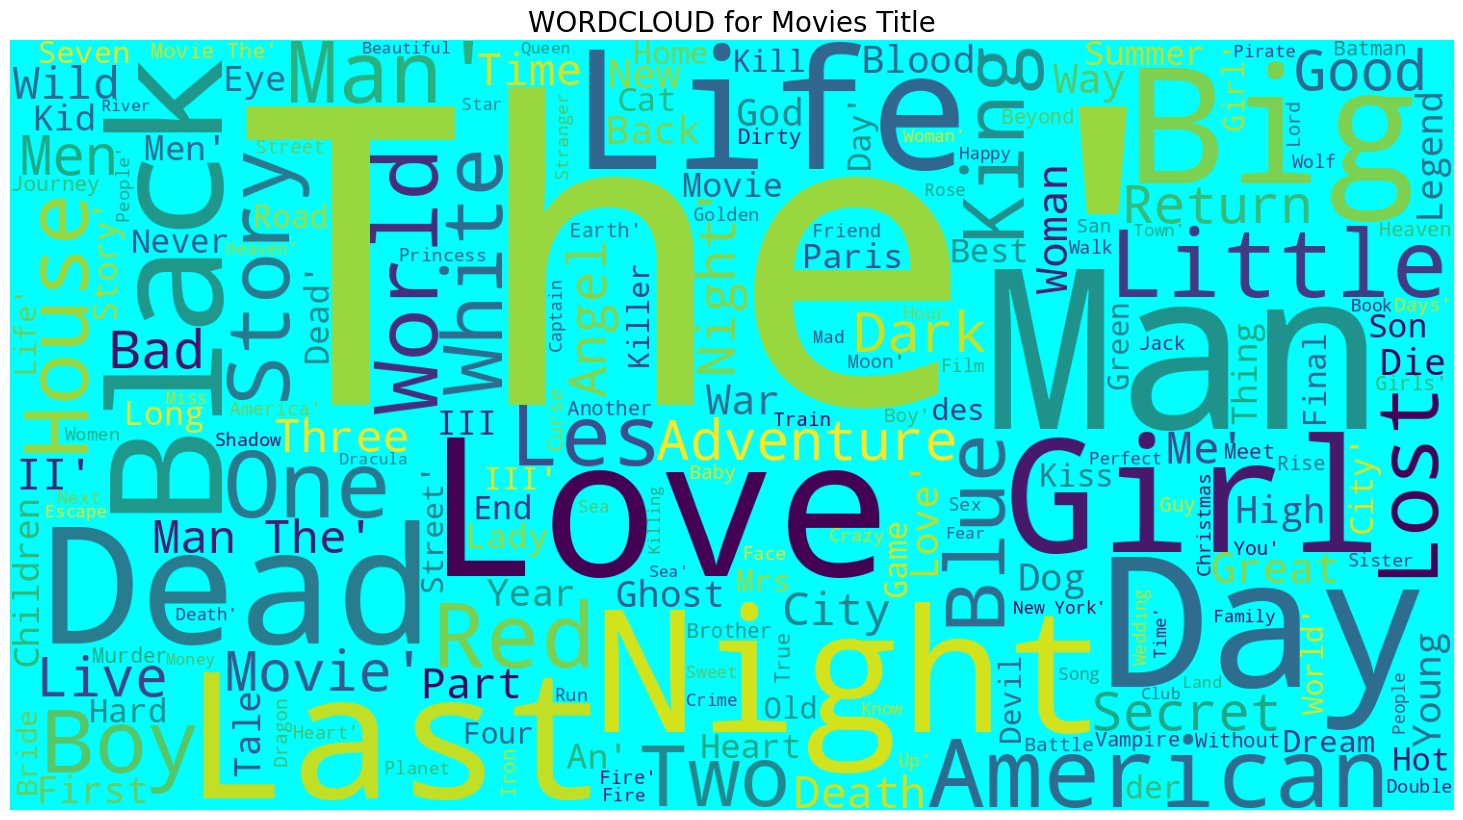

In [92]:
plt.figure(figsize=(20,10))
plt.axis('off')
plt.title('WORDCLOUD for Movies Title',fontsize=20)
plt.imshow(wordcloud_title)

In [93]:
movie_rating=pd.merge(ratingdf,moviedf,on='movieId')
movie_rating.drop('timestamp',axis=1,inplace=True)
movie_rating

,userId,movieId,rating,title,genres
0,1,16,4.0,Casino (1995),Crime|Drama
1,9,16,4.0,Casino (1995),Crime|Drama
2,12,16,1.5,Casino (1995),Crime|Drama
3,24,16,4.0,Casino (1995),Crime|Drama
4,29,16,3.0,Casino (1995),Crime|Drama
...,...,...,...,...,...
105329,668,140098,2.5,Runoff (2015),Drama
105330,668,140816,2.5,Tangerine (2015),Comedy|Drama
105331,668,141472,2.5,The 50 Year Argument (2014),(no genres listed)
105332,668,142488,4.0,Spotlight (2015),Thriller


In [94]:
movie_rating.drop_duplicates(inplace=True)


In [95]:
top_movies=movie_rating[['title','rating']].groupby('title').sum().sort_values('rating',ascending=False).head(10)

In [96]:
print(top_movies)

                                           rating
title                                            
Shawshank Redemption, The (1994)           1372.0
Pulp Fiction (1994)                        1352.0
Forrest Gump (1994)                        1287.0
Silence of the Lambs, The (1991)           1216.5
Star Wars: Episode IV - A New Hope (1977)  1143.5
Matrix, The (1999)                         1113.0
Jurassic Park (1993)                       1076.0
Schindler's List (1993)                    1065.5
Braveheart (1995)                          1019.0
Terminator 2: Judgment Day (1991)          1002.0


<ipython-input-97-933459aca9b5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  c1=sns.barplot(x=top_movies.index,y='rating',data=top_movies,palette=sns.color_palette())


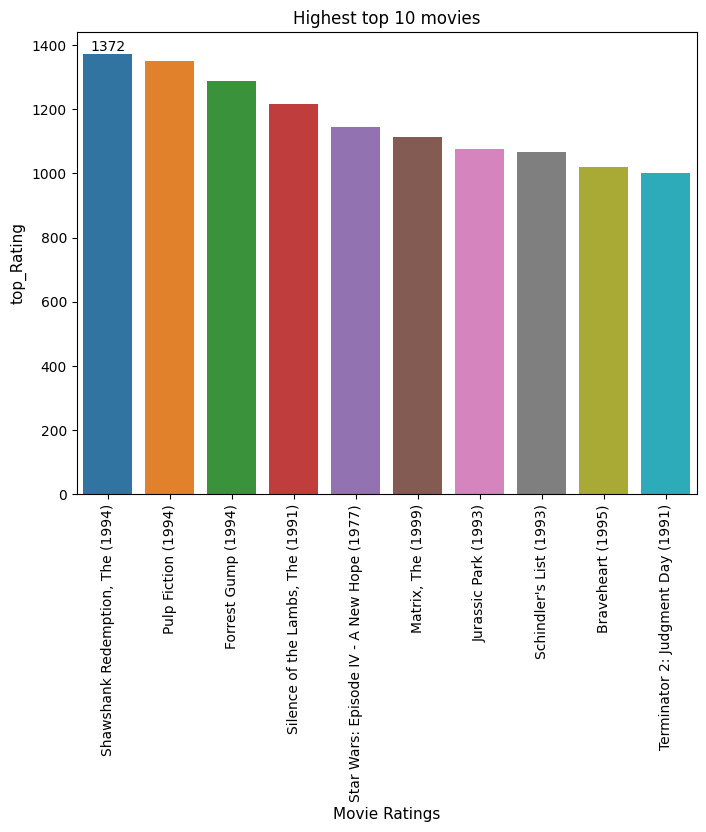

In [97]:
plt.figure(figsize=(8,6))
c1=sns.barplot(x=top_movies.index,y='rating',data=top_movies,palette=sns.color_palette())
c1.bar_label(c1.containers[0])
plt.xticks(rotation=90)
plt.title('Highest top 10 movies')
plt.ylabel('top_Rating',fontsize=11)
plt.xlabel('Movie Ratings',fontsize=11)
plt.show()

Popularity based

It keeps a track of view counts for each movie/video and then lists movies based on views in descending order.



In [104]:
def popularity_recommender(genre, min_reviews, num_recommendations):
    # Filter by genre and minimum review threshold
    genre_movies = movie_rating[(movie_rating['genres'] == genre) & (movie_rating['rating'] >= min_reviews)]

    if genre_movies.empty:
        return "No movies found for the given genre and minimum review threshold."

    # Sort by ratings in descending order
    sorted_movies = genre_movies.sort_values(by='rating', ascending=False)

    # Recommend top N movies
    top_movies = sorted_movies.head(num_recommendations)

    return top_movies[['title', 'rating', 'userId']]

# Example input
genre = 'Comedy'
min_reviews_threshold = 5
num_recommendations = 200

# Get recommendations
recommendations = popularity_recommender(genre, min_reviews_threshold, num_recommendations)
print(recommendations)

                                                   title  rating  userId
1490                                       Clerks (1994)     5.0       3
68756  Borat: Cultural Learnings of America for Make ...     5.0     591
68586                                Big Business (1988)     5.0      42
68599                        Three Men and a Baby (1987)     5.0      42
68723  Borat: Cultural Learnings of America for Make ...     5.0      60
...                                                  ...     ...     ...
92167                              Associate, The (1996)     5.0     578
92168                              Associate, The (1996)     5.0     650
92344                      Brighton Beach Memoirs (1986)     5.0     561
97331      Louis C.K.: Live at the Beacon Theater (2011)     5.0     232
97335      Louis C.K.: Live at the Beacon Theater (2011)     5.0     532

[200 rows x 3 columns]


Create a content-based recommender system thatrecommends top N movies based on similar movie(m) genres.



In [105]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer



def content_based_recommender(movie_title, num_recommendations):
    # Find the row index of the input movie title
    movie_index = movie_rating.index[movie_rating['title'] == movie_rating['title']].tolist()[0]

    # Extract genres of all movies
    genres = movie_rating['genres']

    # Initialize CountVectorizer to convert text data into token counts
    count_vectorizer = CountVectorizer()
    genre_matrix = count_vectorizer.fit_transform(genres)

    # Calculate cosine similarity between the input movie and all other movies
    similarity_scores = cosine_similarity(genre_matrix, genre_matrix[movie_index])

    # Enumerate through similarity scores and keep track of movie indices
    movie_indices_scores = list(enumerate(similarity_scores))

    # Sort movie indices based on similarity scores
    sorted_movie_indices = sorted(movie_indices_scores, key=lambda x: x[1], reverse=True)

     # Exclude the input movie itself
    sorted_movie_indices = sorted_movie_indices[1:]

    # Recommend top N similar movies
    top_movie_indices = [index for index, _ in sorted_movie_indices[:num_recommendations]]
    recommended_movies = movie_rating.iloc[top_movie_indices]

    return recommended_movies[['title', 'genres']]

# Example input
movie_title = 'Toy Story'
num_recommendations = 100

# Get recommendations
recommendations = content_based_recommender(movie_title, num_recommendations)
print(recommendations)

                                 title       genres
1                        Casino (1995)  Crime|Drama
2                        Casino (1995)  Crime|Drama
3                        Casino (1995)  Crime|Drama
4                        Casino (1995)  Crime|Drama
5                        Casino (1995)  Crime|Drama
...                                ...          ...
2342  Shawshank Redemption, The (1994)  Crime|Drama
2343  Shawshank Redemption, The (1994)  Crime|Drama
2344  Shawshank Redemption, The (1994)  Crime|Drama
2345  Shawshank Redemption, The (1994)  Crime|Drama
2346  Shawshank Redemption, The (1994)  Crime|Drama

[100 rows x 2 columns]


Create a collaborative based recommender system which recommends top N movies based on “K” similar users for a target user “u”



In [106]:
def get_movie_recommendation(movie_name):
    n_movies_to_reccomend = 10
    movie_list = movie_rating[movie_rating['title'].str.contains(movie_name)]
    if len(movie_list):
        movie_idx= movie_list.iloc[0]['movieId']
        movie_idx = final_dataset[final_dataset['movieId'] == movie_idx].index[0]
        distances , indices = knn.kneighbors(csr_data[movie_idx],n_neighbors=n_movies_to_reccomend+1)
        rec_movie_indices = sorted(list(zip(indices.squeeze().tolist(),distances.squeeze().tolist())),key=lambda x: x[1])[:0:-1]
        recommend_frame = []
        for val in rec_movie_indices:
            movie_idx = final_dataset.iloc[val[0]]['movieId']
            idx = df_movies[df_movies['movieId'] == movie_idx].index
            recommend_frame.append({'Title':df_movies.iloc[idx]['title'].values[0],'Distance':val[1]})
        df = pd.DataFrame(recommend_frame,index=range(1,n_movies_to_reccomend+1))
        return df['Title']
    else:
        return "No movies found. Please check your input"

In [107]:
get_movie_recommendation('Toy Story (1995)')


<ipython-input-106-af11909eca72>:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  movie_list = movie_rating[movie_rating['title'].str.contains(movie_name)]


'No movies found. Please check your input'

In [109]:
import random
movie=random.choice(movie_rating.title.unique())
print("Recommendation for movie :  {}\n".format(movie))
get_movie_recommendation(movie)

Recommendation for movie :  Angus, Thongs and Perfect Snogging (2008)



<ipython-input-106-af11909eca72>:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  movie_list = movie_rating[movie_rating['title'].str.contains(movie_name)]


'No movies found. Please check your input'